In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("test.csv")

In [4]:
df.head()
df.shape

(1459, 80)

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

<Axes: >

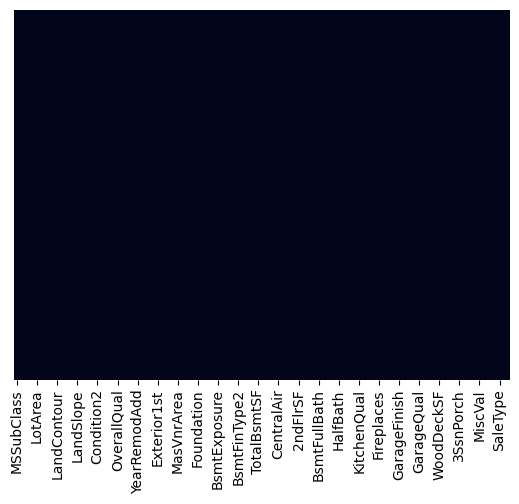

In [40]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [7]:
df["MSZoning"].value_counts()

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: count, dtype: int64

In [8]:
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())

In [9]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [10]:
df.drop(['Alley'], axis=1, inplace=True)

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [33]:
df['LotConfig'].isnull().sum()

np.int64(0)

In [32]:
df['LotConfig'].dtype

dtype('O')

In [29]:
df['BsmtCond'] = df['BsmtCond'].fillna(df["BsmtCond"].mode()[0])

In [34]:
def handle_missing_values(df):
    """
    Cleans the DataFrame by handling missing values:
    - Drops columns with >50% missing values
    - Fills remaining missing values:
        - Numerical columns: fill with mean
        - Categorical columns: fill with mode
    """
    # Calculate the threshold for 50% missing
    threshold = 0.5 * len(df)
    
    for col in df.columns:
        null_count = df[col].isnull().sum()
        
        if null_count > threshold:
            # Drop column if more than 50% missing
            df = df.drop(columns=[col])
            print(f"Column '{col}' dropped because it has {null_count} null values (>50%).")
        else:
            # Fill missing values
            if df[col].dtype in ['int64', 'float64']:
                mean_value = df[col].mean()
                df[col] = df[col].fillna(mean_value)
                print(f"Column '{col}' missing values filled with mean: {mean_value}")
            else:  # object / categorical
                mode_value = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
                df[col] = df[col].fillna(mode_value)
                print(f"Column '{col}' missing values filled with mode: {mode_value}")
    
    return df


In [35]:
df = handle_missing_values(df)

Column 'Id' missing values filled with mean: 2190.0
Column 'MSSubClass' missing values filled with mean: 57.37834132967786
Column 'MSZoning' missing values filled with mode: RL
Column 'LotFrontage' missing values filled with mean: 68.58035714285714
Column 'LotArea' missing values filled with mean: 9819.161069225496
Column 'Street' missing values filled with mode: Pave
Column 'LotShape' missing values filled with mode: Reg
Column 'LandContour' missing values filled with mode: Lvl
Column 'Utilities' missing values filled with mode: AllPub
Column 'LotConfig' missing values filled with mode: Inside
Column 'LandSlope' missing values filled with mode: Gtl
Column 'Neighborhood' missing values filled with mode: NAmes
Column 'Condition1' missing values filled with mode: Norm
Column 'Condition2' missing values filled with mode: Norm
Column 'BldgType' missing values filled with mode: 1Fam
Column 'HouseStyle' missing values filled with mode: 1Story
Column 'OverallQual' missing values filled with m

In [38]:
df.drop(['Id'], axis=1,inplace=True)


In [41]:
df.shape

(1459, 74)

In [43]:
df.to_csv("formulatedtest.csv", index=False)